<a href="https://colab.research.google.com/github/2021BUSTER/deep-learning_yerin/blob/main/16_3CNN_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%A0%81%EC%9A%A9_MNIST_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [19]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

#***속성값을 지닌 X, 클래스 값을 지닌 Y로 구분***
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32') / 255

# 바이너리화 과정 (원-핫 인코딩)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [20]:
# 컨볼루션 신경망의 설정
model = Sequential()

#커널 수 32개, 커널 사이즈 3x3, input_shape = (행,열,색상(1:흑백))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=2)) #Maxpooling을 사용하여 전체 사이즈를 1/2로 축소
model.add(Dropout(0.25)) #과적함을 효과적으로 줄이기 위해 25%의 노드를 dropout함
model.add(Flatten()) #2차원 -> 1차원

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5)) #과적함을 효과적으로 줄이기 위해 50%의 노드를 dropout함
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정(오차함수, 최적화 함수 설정)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# 모델 최적화 설정(10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단)
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) #모델 업데이트 및 저장
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)  #학습자동중단

# 모델의 실행(샘플 200개를 모두 30번 실행하도록 설정)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.04226, saving model to ./model/01-0.0423.hdf5

Epoch 00002: val_loss improved from 0.04226 to 0.03519, saving model to ./model/02-0.0352.hdf5

Epoch 00003: val_loss improved from 0.03519 to 0.03306, saving model to ./model/03-0.0331.hdf5

Epoch 00004: val_loss improved from 0.03306 to 0.03236, saving model to ./model/04-0.0324.hdf5

Epoch 00005: val_loss improved from 0.03236 to 0.02864, saving model to ./model/05-0.0286.hdf5

Epoch 00006: val_loss improved from 0.02864 to 0.02673, saving model to ./model/06-0.0267.hdf5

Epoch 00007: val_loss did not improve from 0.02673

Epoch 00008: val_loss did not improve from 0.02673

Epoch 00009: val_loss did not improve from 0.02673

Epoch 00010: val_loss did not improve from 0.02673

Epoch 00011: val_loss improved from 0.02673 to 0.02587, saving model to ./model/11-0.0259.hdf5

Epoch 00012: val_loss did not improve from 0.02587

Epoch 00013: val_loss did not improve from 0.02587

Epoch 00014: val_lo

In [23]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

313/313 [==============================] - 7s 21ms/step - loss: 0.0326 - accuracy: 0.9930

 Test Accuracy: 0.9930


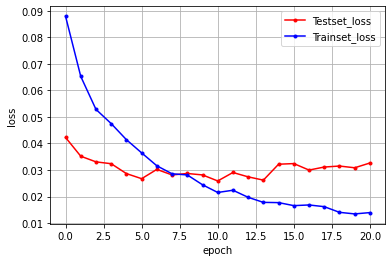

In [24]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()